# Exercise: "Human learning" with iris data

**Question:** Can you predict the species of an iris using petal and sepal measurements?

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Task 1

Read the iris data into a pandas DataFrame, including column names.

In [4]:
# define a list of column names (as strings)
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# define the URL from which to retrieve the data (as a string)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# retrieve the CSV file and add the column names
iris = pd.read_csv(url, header=None, names=col_names)

In [5]:
# observe first five rows of data
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Task 2

Gather some basic information about the data.

In [130]:
setosa = iris[iris.species=="Iris-setosa"]
versi = iris[iris.species!="Iris-versicolor"]
virigin = iris[iris.species=="Iris-virginica"]
iris.species.unique()
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [17]:
setosa.describe()
# sepal_length 5.00
# sepal_width 3.42
# petal_length 1.46

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [18]:
versi.describe()
# sepal_length 5.79
# sepal_width 3.20
# petal length 3.51

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.797000,3.196000,3.508000,1.135000
std,0.945319,0.416071,2.094229,0.919198
min,4.300000,2.200000,1.000000,0.100000
25%,5.000000,3.000000,1.500000,0.200000
50%,5.700000,3.150000,3.200000,1.000000
75%,6.500000,3.400000,5.525000,2.000000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
virigin.describe()
# sepal_length 6.59
# sepal width 2.97
# petal_length 5.55

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## Task 3

Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [60]:
iris.sort_values(by='sepal_length').head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
13,4.3,3.0,1.1,0.1,Iris-setosa,1
42,4.4,3.2,1.3,0.2,Iris-setosa,1
38,4.4,3.0,1.3,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
41,4.5,2.3,1.3,0.3,Iris-setosa,1


In [61]:
iris.sort_values(by='sepal_width').head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
60,5.0,2.0,3.5,1.0,Iris-versicolor,2
62,6.0,2.2,4.0,1.0,Iris-versicolor,2
119,6.0,2.2,5.0,1.5,Iris-virginica,3
68,6.2,2.2,4.5,1.5,Iris-versicolor,2
41,4.5,2.3,1.3,0.3,Iris-setosa,1


In [62]:
iris.sort_values(by='petal_length').head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
22,4.6,3.6,1.0,0.2,Iris-setosa,1
13,4.3,3.0,1.1,0.1,Iris-setosa,1
14,5.8,4.0,1.2,0.2,Iris-setosa,1
35,5.0,3.2,1.2,0.2,Iris-setosa,1
36,5.5,3.5,1.3,0.2,Iris-setosa,1


In [ ]:
iris.sort_values(by='petal_length').head()

### sorting

Iris-virginica     5
Iris-versicolor    1
Name: species, dtype: int64

### split-apply-combine

### visualization

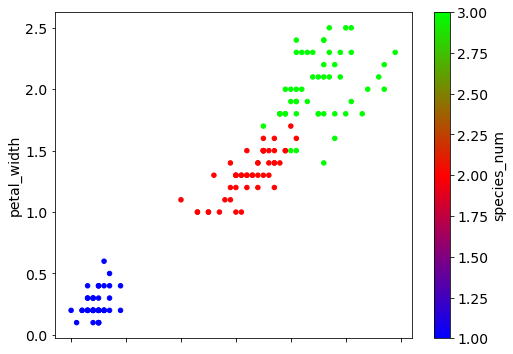

In [118]:
# add a column to map the species name to a number, 
# as needed to color visualizations by the species

def map_species(species):
    if species == 'Iris-setosa':
        return 1
    elif species == 'Iris-versicolor':
        return 2
    else: 
        return 3
    
iris['species_num'] = \
    iris['species'].map(lambda x: map_species(x))

# iris.plot()
iris.plot.scatter(x='petal_length', y='petal_width', c='species_num', colormap='brg')

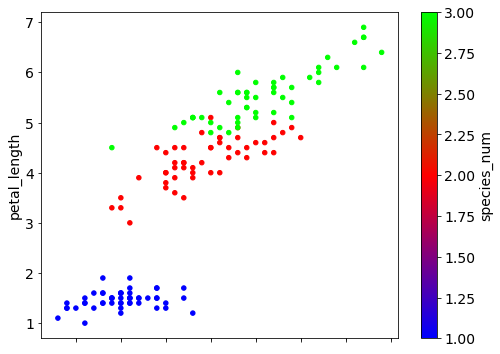

In [119]:
iris.plot.scatter(x='sepal_length', y='petal_length', c='species_num', colormap='brg')

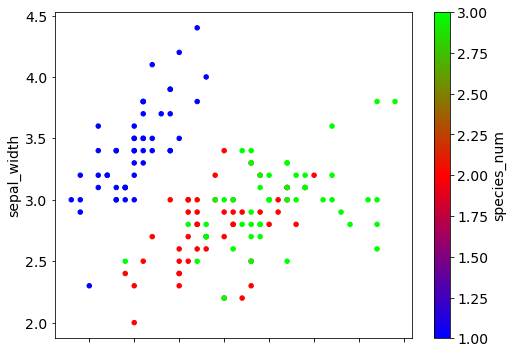

In [127]:
iris.plot.scatter(x='sepal_length', y='sepal_width', c='species_num', colormap='brg')

## Task 4

Write down a set of rules that could be used to predict species based on iris measurements.

In [ ]:
petal_width>1.5=Virginica
petal_width< 1 = Setosa
petal_length < 2 = Setosa
petal_length > 4.5 = Virginica
sepal_width > .5x+2.5 = Setosa 

## Bonus

Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.